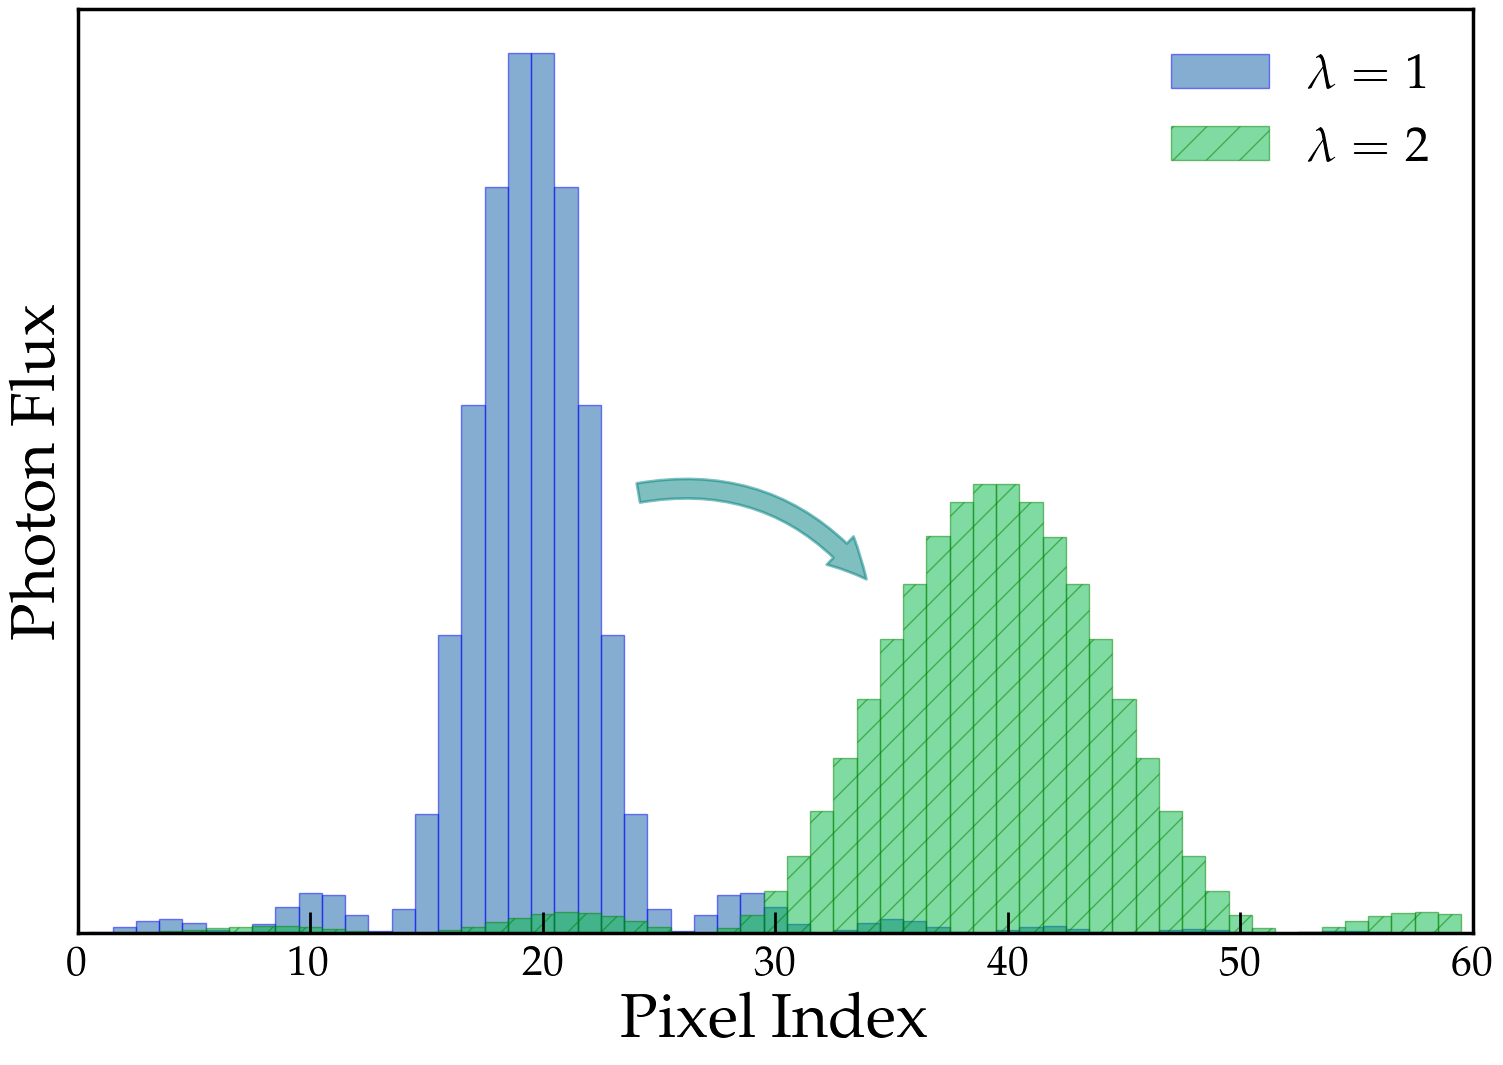

In [408]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv

# Define parameters (example values)
Delta = 1.0   # dimensionless
D = 1.0       # aperture size
P = 1.0       # period
lambda1 = 1
lambda2 = 2

# Define theta range
theta = np.linspace(0, 3, 30000)
# k as function of theta
k1 = 2 * np.pi / lambda1 * theta
k2 = 2 * np.pi / lambda2 * theta

# Bessel term
J1_term = jv(1, Delta/2)

# Define E1(k)
def E1(k):
    return J1_term * D * np.sinc((D / 2) * (2 * np.pi / P - k))

# Intensity (square of magnitude)
I1 = np.abs(E1(k1))**2
I1 = I1/np.max(I1)
I2 = np.abs(E1(k2))**2
I2 = I2/np.max(I2) * lambda1/lambda2 # dividing by lambda2 preserves photon flux.
#I2 = I2/np.max(I1)

# Define bins for theta
bin_width = 0.05
bins1 = np.arange(0, 3+bin_width, bin_width)

# Plot histograms
h1, _ = np.histogram(theta, bins=bins1, weights=I1)
h2, _ = np.histogram(theta, bins=bins1, weights=I2)
# Number of bins
n1 = len(h1)
n2 = len(h2)
# Make sure they're the same length (they will be if you choose the conjugate bins)
assert n1 == n2
indices = np.arange(n1)
plt.figure(figsize=(18,12))
plt.bar(indices, h1/np.max(h1), width=1, label=r'$\lambda = 1$', alpha=0.5,linewidth=1,edgecolor='blue')
plt.bar(indices, h2/np.max(h1), width=1, label=r'$\lambda = 2$', alpha=0.5,linewidth=1,hatch='/',edgecolor='green')

plt.xlim(0,60)
plt.ylim(0,1.05)
ax = plt.gca()

ax.annotate('',xy=(34,0.4),xytext=(24,0.5),arrowprops=
            {
                "arrowstyle": "simple,tail_width=0.5,head_width=1,head_length=1",
                "color": (0, 0.5, 0.5),
                "connectionstyle": "arc3, rad=-0.3",
                "linewidth": 2,
                "alpha": 0.5
            }
            )

ax.set_yticks([])
ax.tick_params(axis='x', which='both', top=False)

plt.xlabel('Pixel Index')
plt.ylabel('Photon Flux')

plt.legend()
plt.show()


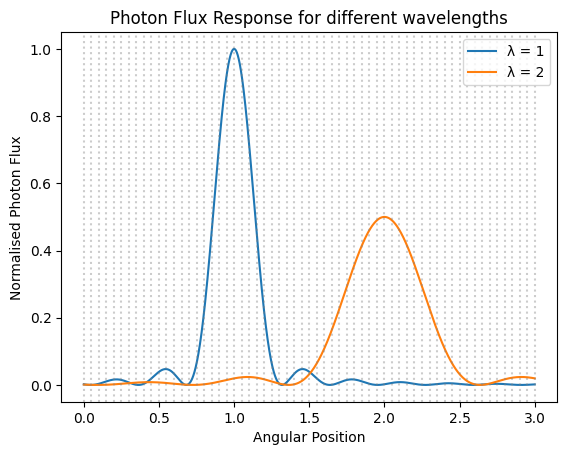

In [146]:
plt.figure()
plt.plot(theta, I1, label=f'λ = {lambda1}')
plt.plot(theta, I2, label=f'λ = {lambda2}')
plt.title('Photon Flux Response for different wavelengths')
plt.ylabel('Normalised Photon Flux')
plt.xlabel('Angular Position')

for edge in bins1:
    plt.axvline(edge, linestyle=':', color='grey', alpha=0.4)
    #plt.axvline(edge/2, linestyle='-',color='red',alpha=0.2)

plt.legend()
plt.show()


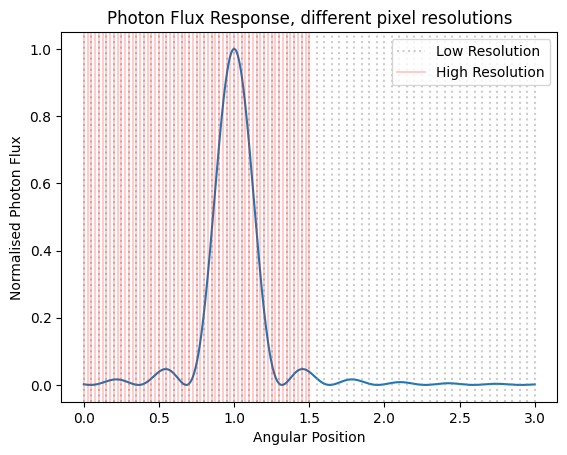

In [150]:
plt.figure()
plt.plot(theta, I1)
#plt.plot(theta, I2, label=f'λ = {lambda2}')
plt.title('Photon Flux Response, different pixel resolutions')
plt.ylabel('Normalised Photon Flux')
plt.xlabel('Angular Position')

for i, edge in enumerate(bins1):
    if i == 0:
        plt.axvline(edge, linestyle=':', color='grey', alpha=0.4,label='Low Resolution')
        plt.axvline(edge/2, linestyle='-',color='red',alpha=0.2,label='High Resolution')
    else:
        plt.axvline(edge, linestyle=':', color='grey', alpha=0.4)
        plt.axvline(edge/2, linestyle='-',color='red',alpha=0.2)

plt.legend()
plt.show()

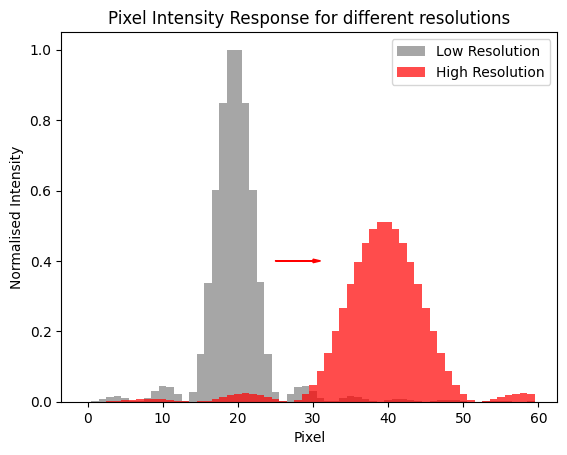

In [165]:
# Define bins for theta
bin_width = 0.05
bins1 = np.arange(0, 3+bin_width, bin_width)
bins2 = np.arange(0, 3/2 + 0.5*bin_width, 0.5*bin_width)

# Plot histograms
h1, _ = np.histogram(theta, bins=bins1, weights=I1)
h1_2, _ = np.histogram(theta, bins=bins2, weights=I1)
# Number of bins
n1 = len(h1)
n2 = len(h2)
# Make sure they're the same length (they will be if you choose the conjugate bins)
assert n1 == n2
indices = np.arange(n1)
plt.figure()
plt.bar(indices, h1/np.max(h1), width=1, label='Low Resolution', alpha=0.7,color='grey')
plt.bar(indices, h1_2/np.max(h1), width=1, label='High Resolution', alpha=0.7,color='red')
plt.xlabel('Pixel')
plt.ylabel('Normalised Intensity')
plt.title('Pixel Intensity Response for different resolutions')
plt.arrow(25, 0.4, 5, 0, head_width=0.01, head_length=1, color='red')
plt.legend()
plt.show()

In [212]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import numpy as np
import math
import matplotlib.patches as mpatches


def annotation_with_arc_arrow(ax, text, xy, xytext, color, headwidth, patchB_radius, text_alpha=1, size=20, arrow_alpha=1):
    """Annotates a certain point on a plot with a simple arrow of a specified color, head width,
    patchB radius, and text alpha value (to be able to generate transparent text)"""
    text_props = {'alpha': text_alpha}
    # transparent circle, limiting the arrow
    patchB = mpatches.Circle(xy, patchB_radius, alpha=0)
    ax.add_artist(patchB)
    ax.annotate(text,
                xy=xy,
                xycoords='data',
                xytext=xytext,
                textcoords='data',
                size=size,
                arrowprops=dict(facecolor=color,
                                ec='none',
                                arrowstyle='simple, head_width={0}'.format(headwidth),
                                patchB=patchB,
                                connectionstyle="arc3,rad=0.3",
                                alpha=arrow_alpha
                                ),
                **text_props
                )

   
def gradient_annotation(ax, text, xy, xytext, cmap, size = 20, arrow_alpha = 1):
    """Annotates a certain point on a plot using a bent arrow with gradient color from tail to head"""
    # get the absolute differences in coordinates of the annotated point and the text
    dx = abs(xy[0] - xytext[0])
    dy = abs(xy[1] - xytext[1])
    # make those differences slightly smaller to compute a slightly smaller patch radius
    dx = dx - dx/50
    dy = dy - dy/50
    # get a radius, which is slightly smaller than the distance between the annotated point and the text
    r = math.sqrt(dx**2 + dy**2)
    # draw an arrow of the very first color from the map, with a head and text
    annotation_with_arc_arrow(ax, text, xy, xytext, cmap(0), 0.5, 0, size=size, arrow_alpha=arrow_alpha)
    # draw many overlapping headless arrows of varying colors and patchB radii, with transparent text
    # transparent patchB with a gradually increasing radius limits the arrow size
    for i in range(1, cmap.N):
        # compute a fraction of the maximum patchB radius
        r_i = r * (i/cmap.N)
        #print(i/cmap.N)
        annotation_with_arc_arrow(ax, text, xy, xytext, cmap(i), 0, r_i, 0, size=size, arrow_alpha=arrow_alpha)


# ax = plt.subplot(111)
# # generate a custom blue-black colormap
# N = 256
# vals = np.ones((N, 4))
# vals[:, 0] = np.linspace(0, 0, N)
# vals[:, 1] = np.linspace(0, 0, N)
# vals[:, 2] = np.linspace(1, 0, N)
# cmap = ListedColormap(vals)
# gradient_annotation(ax, 'Test', (0.2, 0.2), (0.8, 0.8), cmap)
# plt.show()

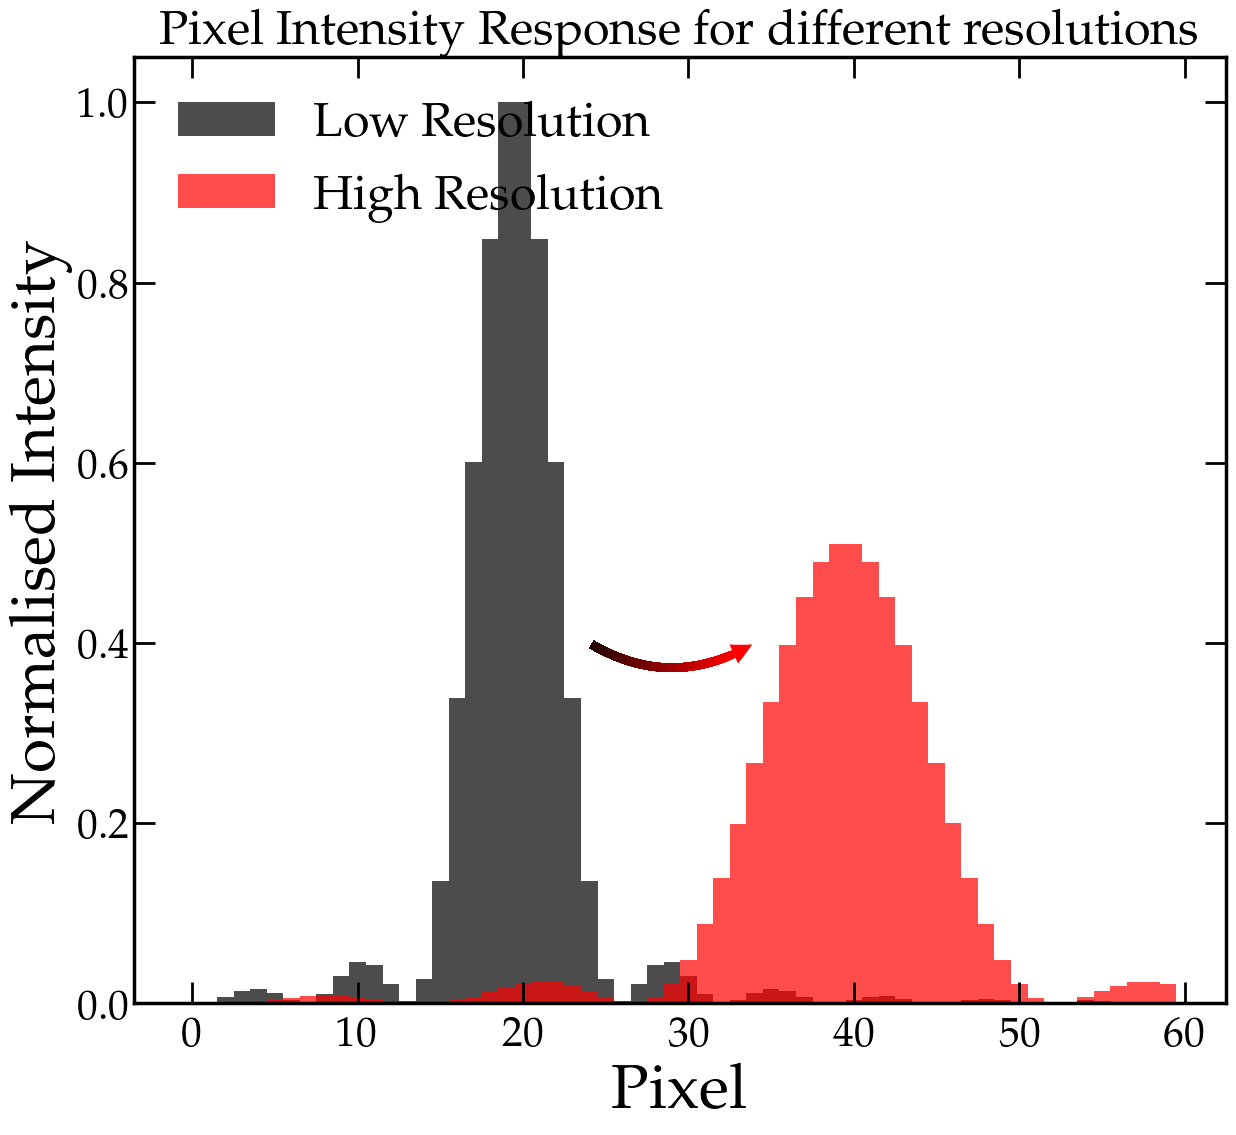

In [243]:
# Define bins for theta
bin_width = 0.05
bins1 = np.arange(0, 3+bin_width, bin_width)
bins2 = np.arange(0, 3/2 + 0.5*bin_width, 0.5*bin_width)

# Plot histograms
h1, _ = np.histogram(theta, bins=bins1, weights=I1)
h1_2, _ = np.histogram(theta, bins=bins2, weights=I1)
# Number of bins
n1 = len(h1)
n2 = len(h2)
# Make sure they're the same length (they will be if you choose the conjugate bins)
assert n1 == n2
indices = np.arange(n1)
plt.figure()
plt.bar(indices, h1/np.max(h1), width=1, label='Low Resolution', alpha=0.7,color='black')
plt.bar(indices, h1_2/np.max(h1), width=1, label='High Resolution', alpha=0.7,color='red')
plt.xlabel('Pixel')
plt.ylabel('Normalised Intensity')
plt.title('Pixel Intensity Response for different resolutions')
# create a blue→black→red colormap for the arrow
N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(1, 0, N)
vals[:, 1] = np.linspace(0, 0, N)
vals[:, 2] = np.linspace(0, 0, N)
cmap = ListedColormap(vals)

ax = plt.gca()
# place a gradient arrow from pixel 25 (y≈0.4) to pixel 30 (y≈0.4)
gradient_annotation(ax,
                    text='',
                    xy=(34, 0.4),
                    xytext=(24, 0.4),
                    cmap=cmap,
                    size=30,
                    arrow_alpha=1)

plt.legend()
plt.tight_layout()
#plt.savefig('arrow_test.pdf')
plt.show()

In [219]:
plt.style.use('sty.mplstyle')

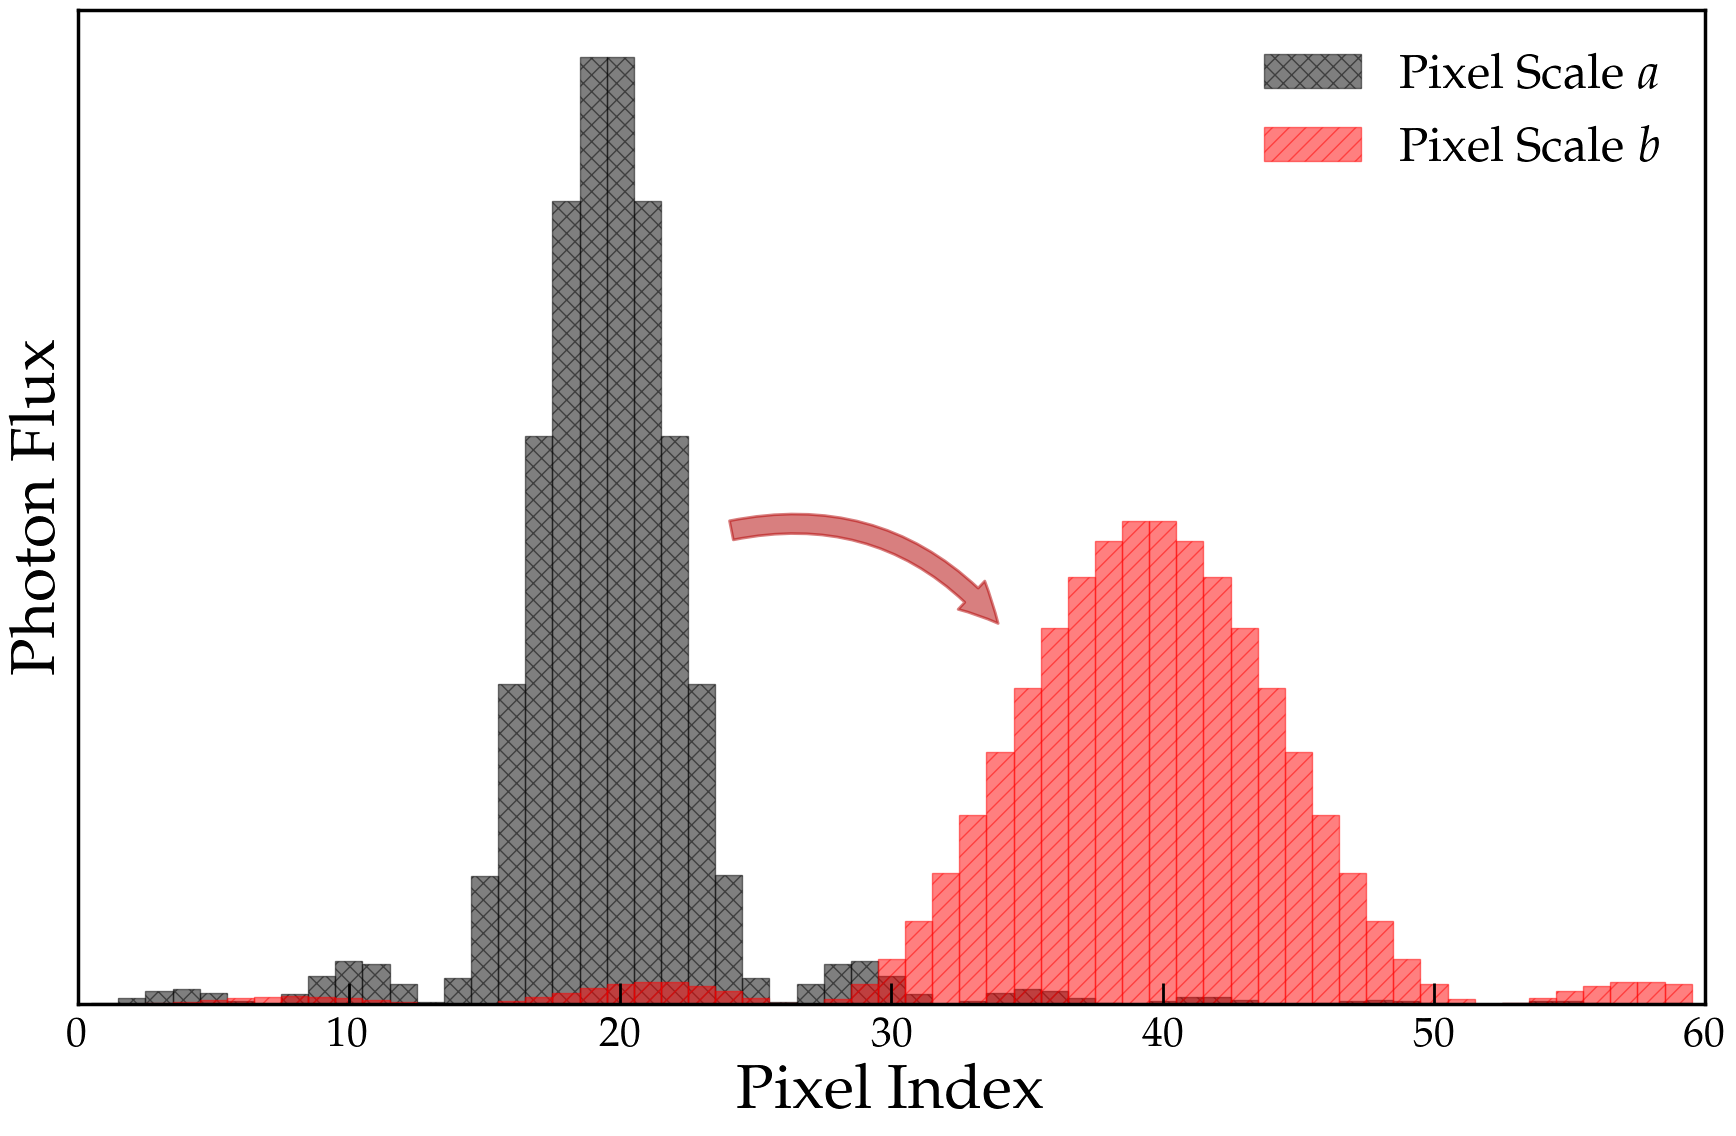

In [417]:
# Define bins for theta
bin_width = 0.05
bins1 = np.arange(0, 3+bin_width, bin_width)
bins2 = np.arange(0, 3/2 + 0.5*bin_width, 0.5*bin_width)

# Plot histograms
h1, _ = np.histogram(theta, bins=bins1, weights=I1)
h1_2, _ = np.histogram(theta, bins=bins2, weights=I1)
# Number of bins
n1 = len(h1)
n2 = len(h2)
# Make sure they're the same length (they will be if you choose the conjugate bins)
assert n1 == n2
indices = np.arange(n1)
# vertical size should be 12. Ciaran doesn't have titles on any of his plots, just figure captions.
plt.figure(figsize=(18,12))
plt.bar(indices, h1/np.max(h1), width=1.0, label=r'Pixel Scale $a$', alpha=0.5, color='black',
        edgecolor='black', linewidth=1,hatch='xx')
plt.bar(indices, h1_2/np.max(h1), width=1.0, label=r'Pixel Scale $b$', alpha=0.5, color='red',
        edgecolor='red', linewidth=1, hatch='//')
plt.xlabel('Pixel Index')
plt.ylabel('Photon Flux')

ax = plt.gca()
ax.annotate('',xy=(34,0.4),xytext=(24,0.5),arrowprops=
            {
                "arrowstyle": "simple,tail_width=0.5,head_width=1,head_length=1",
                "color": (0.7, 0, 0),
                "connectionstyle": "arc3, rad=-0.3",
                "linewidth": 2,
                "alpha": 0.5
            }
            )
# ax.set_xticks([])
ax.set_yticks([])
ax.tick_params(axis='x', which='both', top=False)

# sides = ['top','right']
# for side in sides:
#         ax.spines[side].set_visible(False)

plt.xlim(0,60)
plt.ylim(0,1.05)
plt.legend(loc='upper right')
plt.tight_layout()
#plt.savefig('arrow_test_better.pdf',bbox_inches='tight',transparent=False)
plt.show()

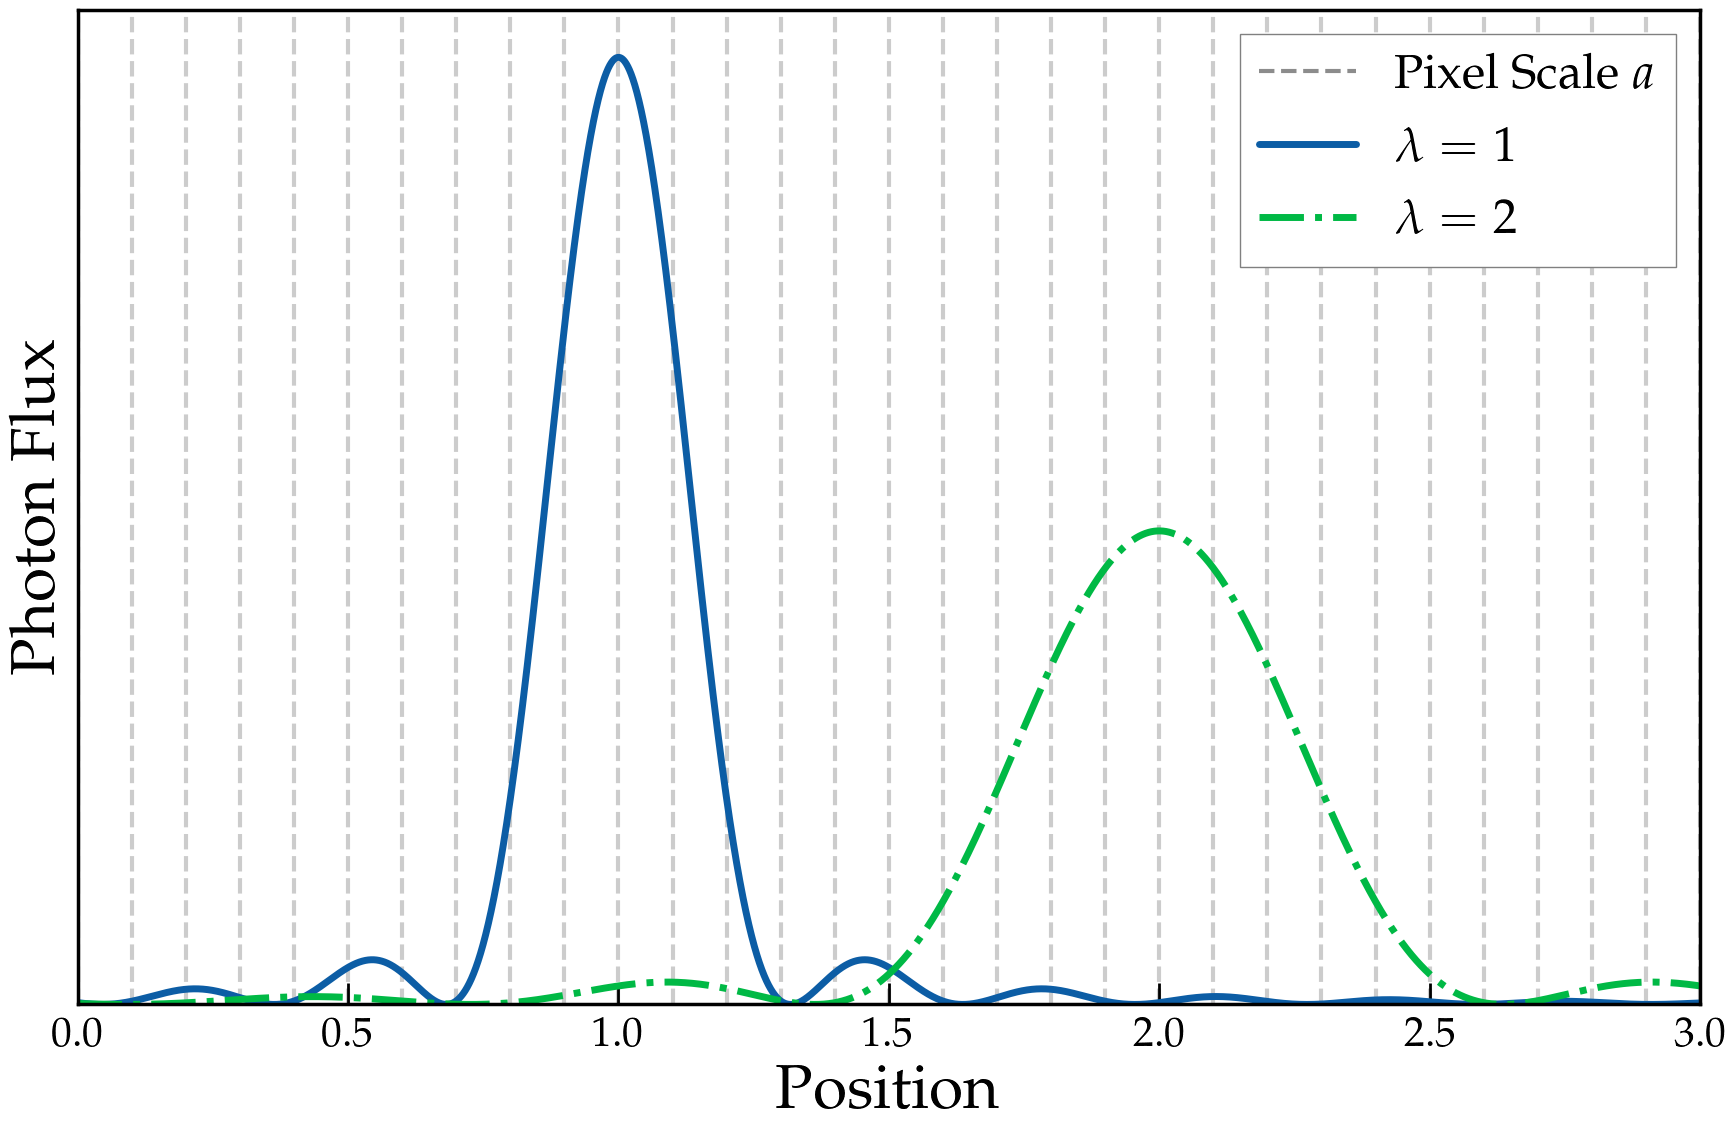

In [428]:
plt.figure(figsize=(18,12))

for i, edge in enumerate(bins1):
    if i == 0:
        plt.axvline(edge, linestyle='--', color='black', alpha=0.45,label=r'Pixel Scale $a$')
    else:
        if (i%2) == 0:
            plt.axvline(edge, linestyle='--', color='black', alpha=0.2)

plt.plot(theta, I1, label=r'$\lambda = 1$',linewidth=5)
plt.plot(theta, I2, label=r'$\lambda = 2$',linestyle='-.',linewidth=5)
#plt.title('Photon Flux Response for different wavelengths')

ax = plt.gca()
ax.set_yticks([])
ax.tick_params(axis='x', which='both', top=False)

plt.xlim(0,3)
plt.ylim(0,1.05)

plt.ylabel('Photon Flux')
plt.xlabel('Position')
plt.legend(frameon=True,framealpha=1,fancybox=False,edgecolor='grey')
plt.tight_layout()
plt.show()

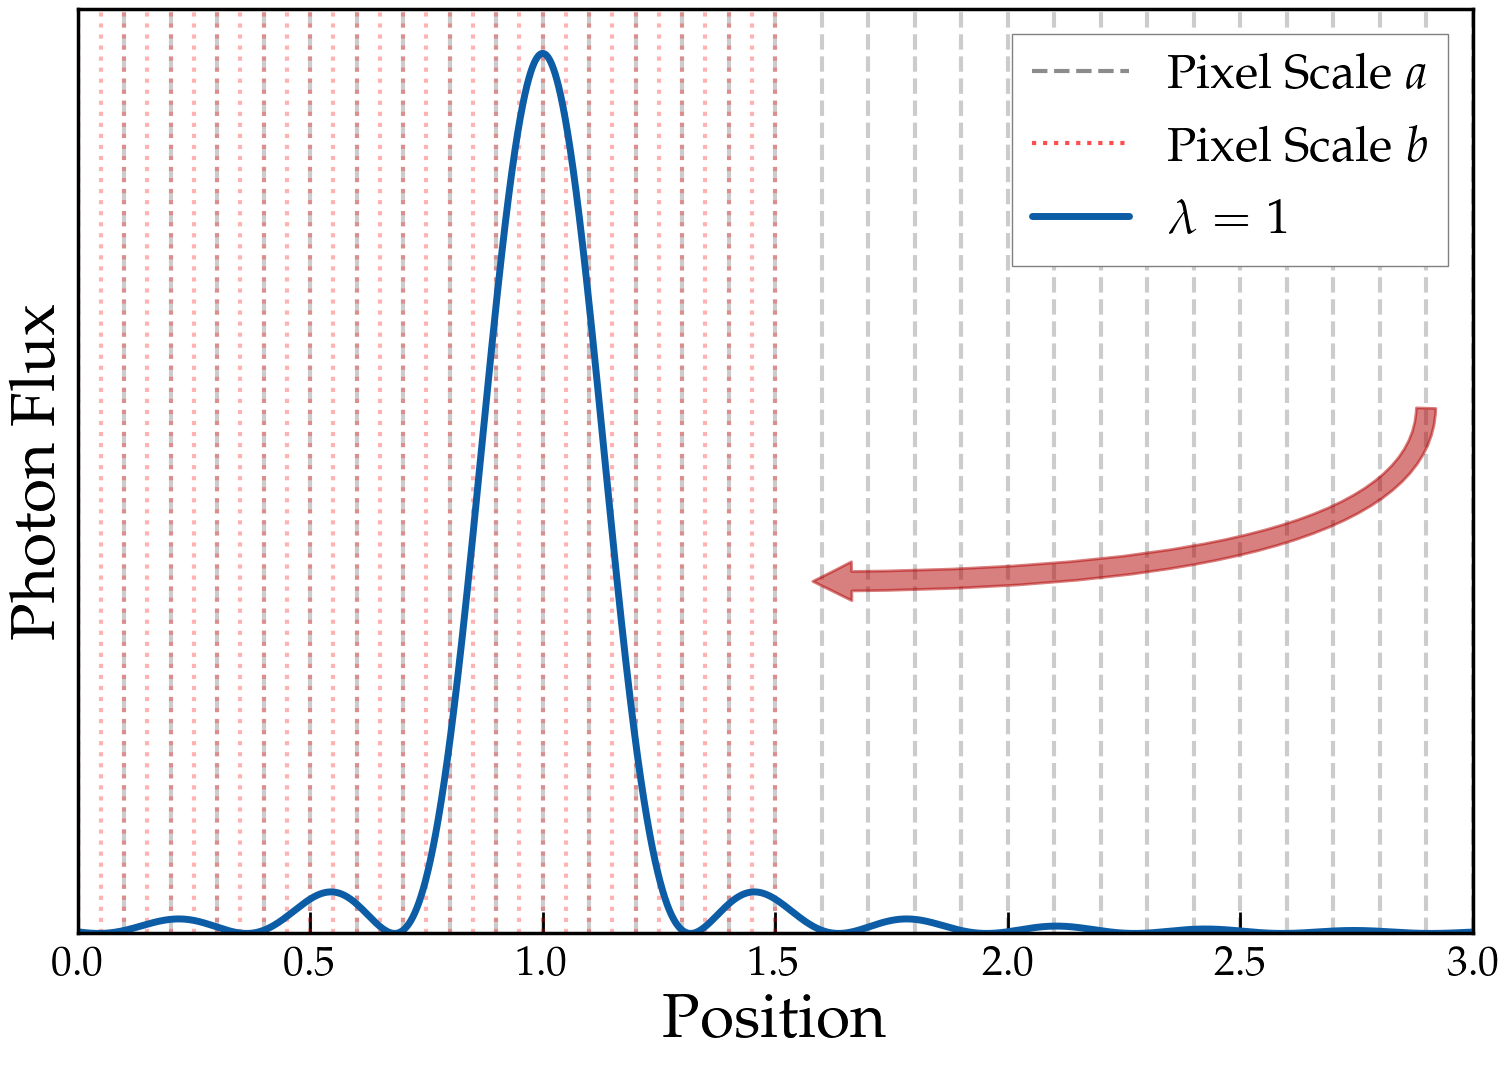

In [427]:
plt.figure(figsize=(18,12))

for i, edge in enumerate(bins1):
    if i == 0:
        plt.axvline(edge, linestyle='--', color='black', alpha=0.45,label=r'Pixel Scale $a$')
        plt.axvline(edge/2, linestyle=':',color='red',alpha=0.7,label=r'Pixel Scale $b$')
    else:
        if (i%2) == 0:
            plt.axvline(edge, linestyle='--', color='black', alpha=0.2)
            plt.axvline(edge/2, linestyle=':',color='red',alpha=0.3)

plt.plot(theta, I1, label=r'$\lambda = 1$',linewidth=5)

ax = plt.gca()
ax.set_yticks([])
ax.tick_params(axis='x', which='both', top=False)

ax.annotate('',xy=(1.575,0.4),xytext=(2.9,0.6),arrowprops=
            {
                "arrowstyle": "simple,tail_width=0.5,head_width=1,head_length=1",
                "color": (0.7, 0, 0),
                "connectionstyle": "angle3,angleA=-90,angleB=0",
                "linewidth": 2,
                "alpha": 0.5
            }
            )
plt.xlim(0,3)
plt.ylim(0,1.05)

plt.ylabel('Photon Flux')
plt.xlabel('Position')

plt.legend(frameon=True,framealpha=1,fancybox=False,edgecolor='grey')

plt.show()

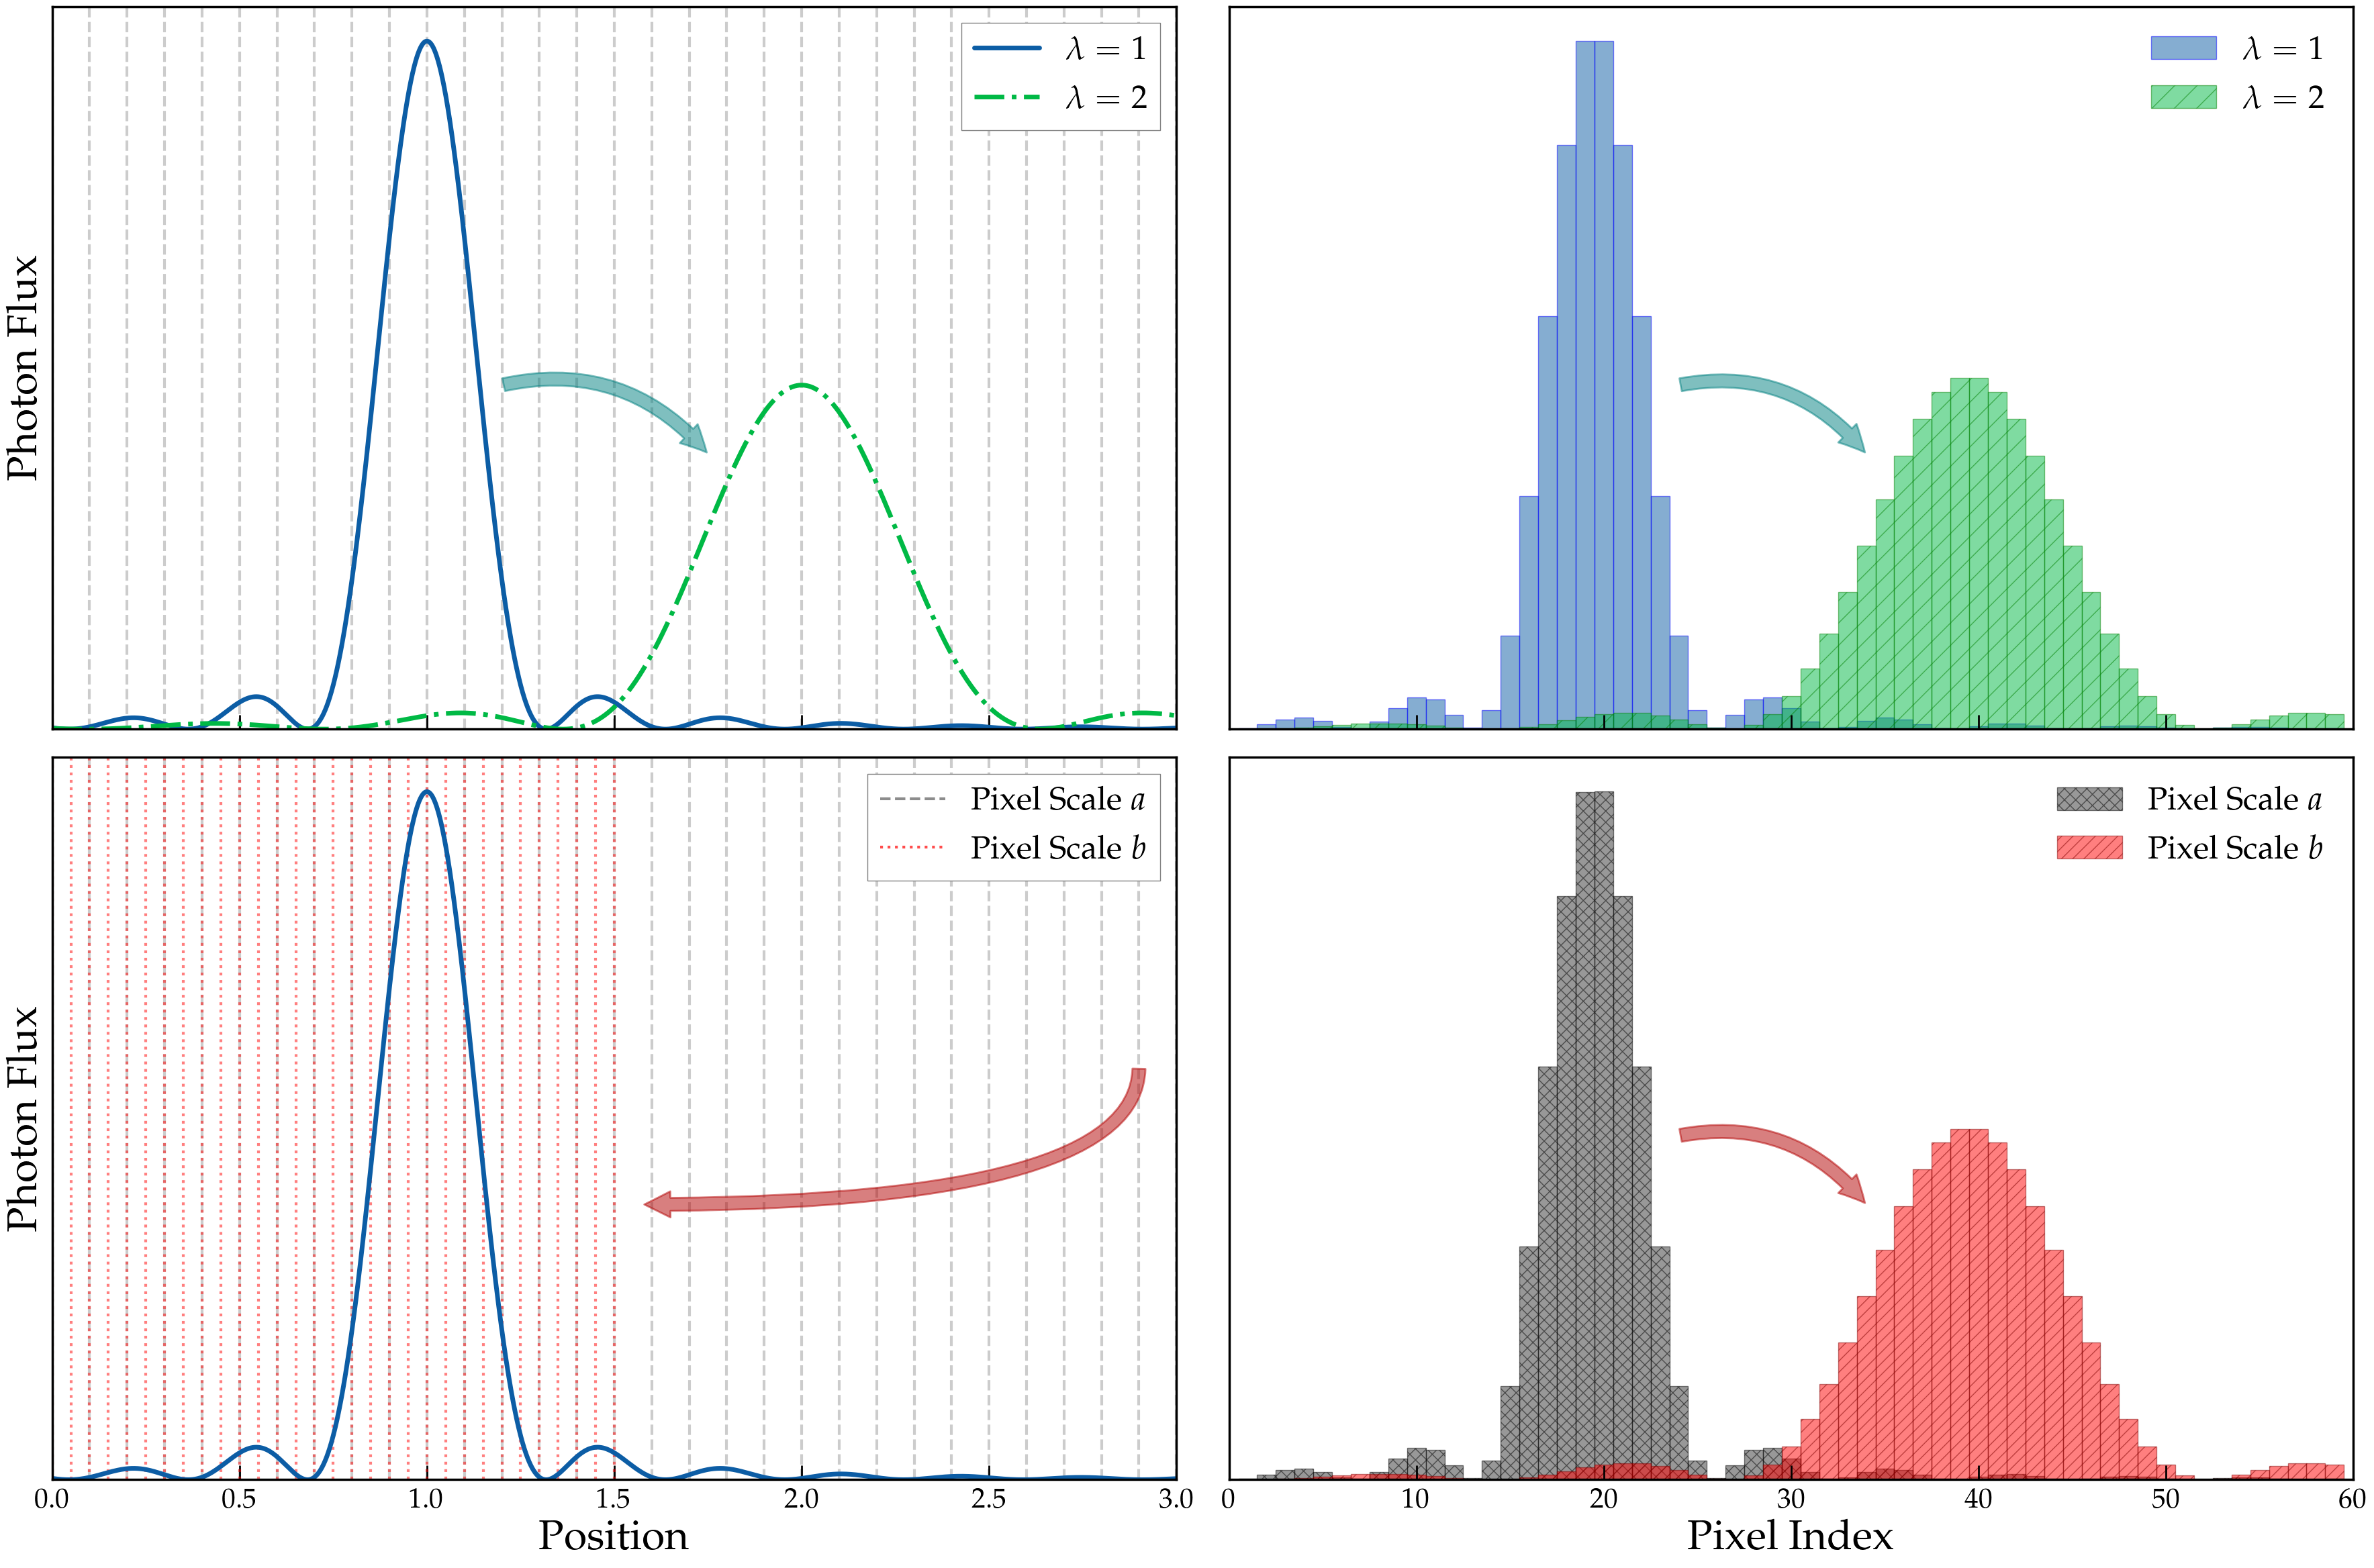

In [456]:
# ==== Subplots ====
fig, axs = plt.subplots(2, 2, figsize=(18*2, 12*2))

# ---- Plot 1 ----
ax = axs[0, 0]
for i, edge in enumerate(bins1):
    if i == 0:
        ax.axvline(edge, linestyle='--', color='black', alpha=0.45)
    elif i % 2 == 0:
        ax.axvline(edge, linestyle='--', color='black', alpha=0.2)
ax.plot(theta, I1, label=r'$\lambda = 1$', linewidth=5)
ax.plot(theta, I2, label=r'$\lambda = 2$', linestyle='-.', linewidth=5)
ax.annotate('', xy=(1.75, 0.4), xytext=(1.2, 0.5), arrowprops={
    "arrowstyle": "simple,tail_width=0.5,head_width=1,head_length=1",
    "color": (0, 0.5, 0.5),
    "connectionstyle": "arc3, rad=-0.3",
    "linewidth": 2,
    "alpha": 0.5
})
ax.set_yticks([])
ax.tick_params(axis='x', which='both', top=False)
ax.set_xticklabels([])
ax.set_xlim(0, 3)
ax.set_ylim(0, 1.05)
ax.set_ylabel('Photon Flux')
#ax.set_xlabel('Position')
ax.legend(frameon=True, framealpha=1, fancybox=False, edgecolor='grey',loc='upper right')

# ---- Plot 2 ----
ax = axs[0, 1]
ax.bar(indices, h1/np.max(h1), width=1, label=r'$\lambda = 1$', alpha=0.5, linewidth=1, edgecolor='blue')
ax.bar(indices, h2/np.max(h1), width=1, label=r'$\lambda = 2$', alpha=0.5, linewidth=1, hatch='/', edgecolor='green')
ax.annotate('', xy=(34, 0.4), xytext=(24, 0.5), arrowprops={
    "arrowstyle": "simple,tail_width=0.5,head_width=1,head_length=1",
    "color": (0, 0.5, 0.5),
    "connectionstyle": "arc3, rad=-0.3",
    "linewidth": 2,
    "alpha": 0.5
})
ax.set_xlim(0, 60)
ax.set_ylim(0, 1.05)
ax.set_yticks([])
ax.tick_params(axis='x', which='both', top=False)
ax.set_xticklabels([])
#ax.set_xlabel('Pixel Index')
#ax.set_ylabel('Photon Flux')
ax.legend()

# ---- Plot 3 ----
ax = axs[1, 0]
for i, edge in enumerate(bins1):
    if i == 0:
        ax.axvline(edge, linestyle='--', color='black', alpha=0.45, label=r'Pixel Scale $a$')
        ax.axvline(edge/2, linestyle=':', color='red', alpha=0.7, label=r'Pixel Scale $b$')
    elif i % 2 == 0:
        ax.axvline(edge, linestyle='--', color='black', alpha=0.2)
        ax.axvline(edge/2, linestyle=':', color='red', alpha=0.5)
ax.plot(theta, I1, linewidth=5)
ax.set_yticks([])
ax.tick_params(axis='x', which='both', top=False)
ax.set_xlim(0, 3)
ax.set_ylim(0, 1.05)
ax.set_ylabel('Photon Flux')
ax.set_xlabel('Position')
ax.annotate('', xy=(1.575, 0.4), xytext=(2.9, 0.6), arrowprops={
    "arrowstyle": "simple,tail_width=0.5,head_width=1,head_length=1",
    "color": (0.7, 0, 0),
    "connectionstyle": "angle3,angleA=-90,angleB=0",
    "linewidth": 2,
    "alpha": 0.5
})
ax.legend(frameon=True, framealpha=1, fancybox=False, edgecolor='grey')

# ---- Plot 4 ----
ax = axs[1, 1]
ax.bar(indices, h1/np.max(h1), width=1.0, label=r'Pixel Scale $a$', alpha=0.5, color=(0.2,0.2,0.2),
       edgecolor='k', linewidth=1, hatch='xx')
ax.bar(indices, h1_2/np.max(h1), width=1.0, label=r'Pixel Scale $b$', alpha=0.5, color=(1,0,0),
       edgecolor=(0.5,0,0), linewidth=1, hatch='//')
ax.set_xlabel('Pixel Index')
#ax.set_ylabel('Photon Flux')
ax.annotate('', xy=(34, 0.4), xytext=(24, 0.5), arrowprops={
    "arrowstyle": "simple,tail_width=0.5,head_width=1,head_length=1",
    "color": (0.7, 0, 0),
    "connectionstyle": "arc3, rad=-0.3",
    "linewidth": 2,
    "alpha": 0.5
})
ax.set_yticks([])
ax.tick_params(axis='x', which='both', top=False)
ax.set_xlim(0, 60)
ax.set_ylim(0, 1.05)
ax.legend(loc='upper right')

# Final Layout
plt.tight_layout()
plt.savefig('pixel_scale_wl_fig.pdf',bbox_inches='tight')
plt.show()